In [1]:
import numpy as np
from catboost import CatBoostClassifier, datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from base_experiment import BaseExperiment

class AmazonExperiment(BaseExperiment):
    POSITIVE_STEPS = [2000, 5000, 10000, 20000, 30872]
    NEGATIVE_STEPS = [500, 1000, 1897]

    def get_dataset(self):
        train_df, _ = datasets.amazon()
        y = train_df['ACTION']
        X = train_df.drop(columns='ACTION') # or X = train_df.drop('ACTION', axis=1)
        return X, y, X.columns
    
    def get_keras_model(self):
        return keras.Sequential([
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1, activation='sigmoid'),
        ])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


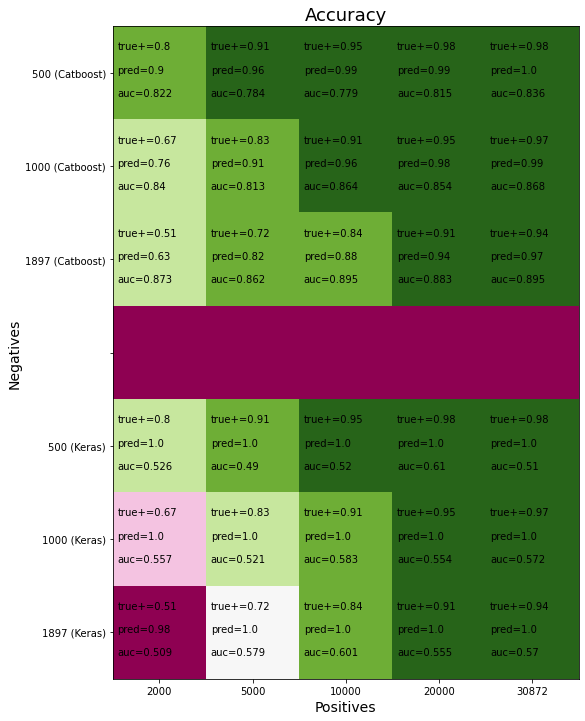

In [3]:
AmazonExperiment().run()